In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

In [ ]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

In [3]:
df["CarName"].unique()[:5]

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls'],
      dtype=object)

Text(0.5, 0, '')

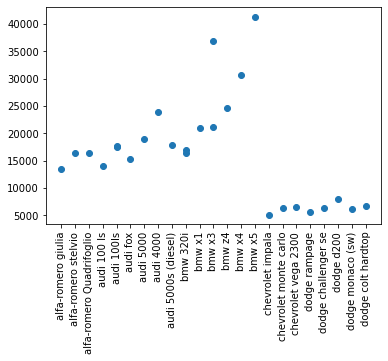

In [4]:
plt.scatter(df["CarName"].loc[:25], df["price"].loc[:25])
plt.xticks(rotation=90)
plt.xlabel("")

In [5]:
com=[]
def extracter(s):
    com = s.split(" ")[0]
    return com
df["CarName"] = df["CarName"].apply(extracter)

In [6]:
df["CarName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [7]:
df.shape

(205, 26)

In [8]:
lst = df.columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
to_encoder = []
for i in list(df.columns):
    if df[i].nunique()<=8 or df[i].dtype == "object":
        to_encoder.append(i)

In [12]:
to_encoder

['symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [13]:
for i in to_encoder:
    print (df[i].unique())

[ 3  1  2  0 -1 -2]
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [14]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<BarContainer object of 205 artists>

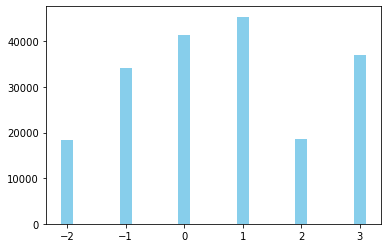

In [15]:
plt.bar(df[to_encoder[0]], df['price'], width = 0.2, color = 'skyblue')

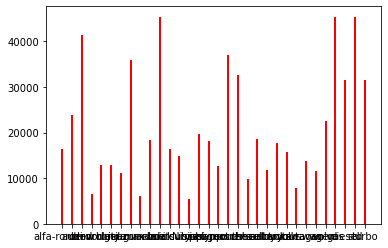

In [16]:
for i in range(1,4):
    plt.bar(df[to_encoder[i]], df['price'], width = 0.2, color = 'red')

<BarContainer object of 205 artists>

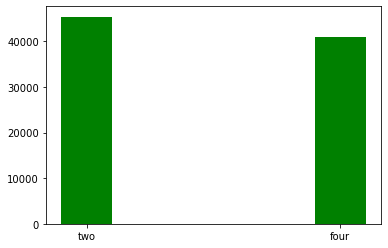

In [17]:
plt.bar(df[to_encoder[4]], df['price'], width = 0.2, color = 'green')

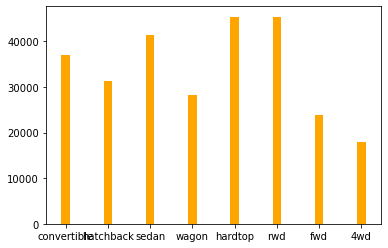

In [18]:
for i in range(5,7):
    plt.bar(df[to_encoder[i]], df['price'], width = 0.2, color = 'orange')

<BarContainer object of 205 artists>

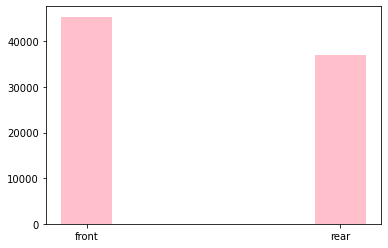

In [19]:
plt.bar(df[to_encoder[7]], df['price'], width = 0.2, color = 'pink')

<BarContainer object of 205 artists>

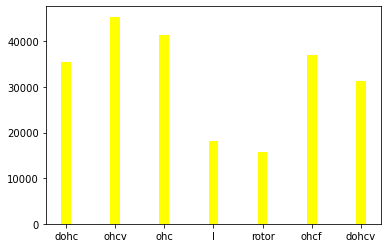

In [20]:
plt.bar(df[to_encoder[8]], df['price'], width = 0.2, color = 'yellow')

In [21]:
for i in to_encoder:
    df[i+"_encoded"] = LabelEncoder().fit_transform(df[i])
    del df[i]

In [22]:
del df["car_ID"]

In [23]:
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,CarName_encoded,fueltype_encoded,aspiration_encoded,doornumber_encoded,carbody_encoded,drivewheel_encoded,enginelocation_encoded,enginetype_encoded,cylindernumber_encoded,fuelsystem_encoded
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,1,1,0,1,0,2,0,0,2,5
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,1,1,0,1,0,2,0,0,2,5
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,1,1,0,1,2,2,0,5,3,5
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,2,1,0,0,3,1,0,3,2,5
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,2,1,0,0,3,0,0,3,1,5


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   wheelbase               205 non-null    float64
 1   carlength               205 non-null    float64
 2   carwidth                205 non-null    float64
 3   carheight               205 non-null    float64
 4   curbweight              205 non-null    int64  
 5   enginesize              205 non-null    int64  
 6   boreratio               205 non-null    float64
 7   stroke                  205 non-null    float64
 8   compressionratio        205 non-null    float64
 9   horsepower              205 non-null    int64  
 10  peakrpm                 205 non-null    int64  
 11  citympg                 205 non-null    int64  
 12  highwaympg              205 non-null    int64  
 13  price                   205 non-null    float64
 14  symboling_encoded       205 non-null    in

In [25]:
df.shape

(205, 25)

In [1]:
x_val = list(df.columns)
x_val.remove("price")


NameError: name 'df' is not defined

In [48]:
X, y = df[x_val],df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=0)

In [49]:
linear_regression = LinearRegression()
model = linear_regression.fit(X_train, y_train)

In [50]:
score = model.score(X_train, y_train)
print('train accuracy : ', score)

train accuracy :  0.9113698989774942


In [51]:
model.coef_

array([ 1.74438393e+02, -3.10817639e+01,  6.42721023e+02,  1.14276853e+02,
        3.83007699e+00,  7.38617439e+01, -2.79050501e+03, -3.27059582e+03,
        4.37993549e+02,  9.72635941e+00,  1.24080250e+00, -1.24408964e+02,
        8.79014556e+01,  3.05286456e+02, -1.37067217e+02,  5.25441607e+03,
        1.17182557e+03, -1.54941881e+03, -1.01309801e+03,  1.38889986e+03,
        1.32713667e+04,  9.80465160e+01,  6.08132582e+01, -1.59900333e+01])

In [52]:
model.intercept_

-60783.87268447336

In [53]:
y_pred = model.predict(X_test)

In [54]:
test_score = r2_score(y_test, y_pred)
print("test accuracy : ", test_score)

test accuracy :  0.8295077818465924
